In [1]:
import sys
import os

# Add ROOT/model path to load own modules
model_path = os.path.normpath(os.path.join(os.getcwd(), *[os.pardir]*2))
sys.path.insert(0, model_path)

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import get_data, ROOT_DIR, custom_r2, custom_adj_r2, plot_predicted_vs_true
from joblib import dump
from joblib import load

%load_ext autoreload
%autoreload 2

In [3]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = get_data()

Xs=[X_train, X_validation, X_test]
Ys=[Y_train, Y_validation, Y_test]

xg_reg = xgb.XGBRegressor(objective='reg:tweedie', learning_rate=0.1, n_estimators=100, max_depth=3, subsample=1.0)

xg_reg.fit(X_train, Y_train, eval_metric="rmse", eval_set=[(X_validation, Y_validation)], verbose=False)

#print(xg_reg.evals_result())

predicted_set_values = [xg_reg.predict(X) for X in Xs]

for i in range(3):
    print("R2:", custom_r2(Y_true=Ys[i], Y_predictions=predicted_set_values[i]))
    print("Adj. R2:", custom_adj_r2(Y_true=Ys[i], Y_predictions=predicted_set_values[i], p=7))

R2: 0.6571621150324569
Adj. R2: 0.6521414765496686
R2: 0.35372321961844644
Adj. R2: 0.32453652631089236
R2: 0.28824609298927695
Adj. R2: 0.25610236815653464


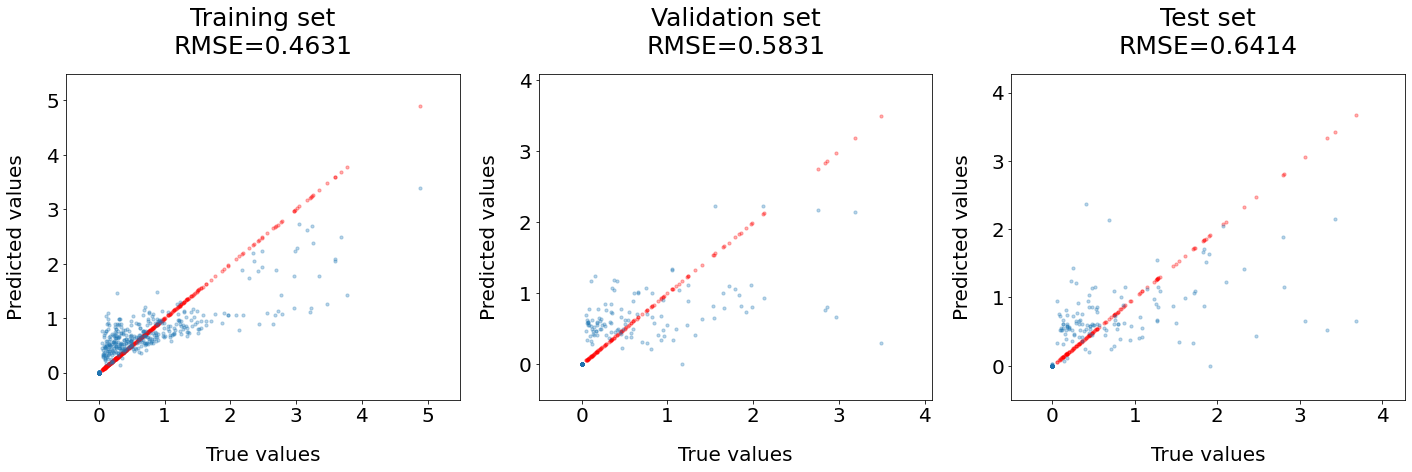

In [4]:
plot_predicted_vs_true(Xs=Xs,
                       Ys=Ys,
                       predicted_set_values=predicted_set_values,
                       path=ROOT_DIR + "/best-models/xgboost//train-validation-test-plot.jpg")


In [5]:
# Save the model
dump(xg_reg, ROOT_DIR+"/best-models/xgboost/model.joblib.dat")

['/all/best-models/xgboost/model.joblib.dat']

In [5]:
#xgboost_model = load(ROOT_DIR+"/best-models/xgboost/model.joblib.dat")

In [6]:
#predictions = xg_reg.predict(X_test)

In [7]:
#plot_preds(Y_test.values, predictions, mean_squared_error(Y_test.values, predictions))